In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [3]:
epoch_type = 'evoked'
# epoch_type = 'pseudo-rs'

In [4]:
all_participants = ['VP07','VP08','VP09', 'VP10','VP11','VP12','VP13','VP14','VP18','VP19','VP20','VP22','VP23','VP24','VP25','VP26','VP27','VP28','VP29','VP30','VP31','VP32','VP33','VP35','VP36','VP37']
# participant = all_participants[1]

# path = '/media/nicolas.bruno/63f8a366-34b7-4896-a7ce-b5fb4ee78535/Nico/MW_eeg_data/minmarker/' #icm-linux
path = '/Users/nicobruno/ownCloud/MW_eeg_data/minmarker/' #nico-mac


In [22]:
df_markers = pd.DataFrame()

for i,v in enumerate(all_participants): 
    participant = v
    
    folder = path + participant +'/'
    
    df_ = pd.read_csv(folder+ participant + '_' + epoch_type + '_all_marker.csv', index_col = 0)
    df_['participant'] = i
    df_markers = df_markers.append(df_)
    
df_markers.to_csv('all_markers.csv')

In [18]:
df_markers.groupby(['probe', 'mind']).count()

wSMI   p_e     k     b  b_n     g  g_n     t  t_n     d  d_n  \
probe mind                                                                    
PC    dMW       171   171   171   171  171   171  171   171  171   171  171   
      on-task   386   386   386   386  386   386  386   386  386   386  386   
      sMW       164   164   164   164  164   164  164   164  164   164  164   
SC    dMW      1148  1148  1148  1148  914  1148  914  1148  914  1148  914   
      sMW      1011  1011  1011  1011  958  1011  958  1011  958  1011  958   

               a_n     a  CNV   P1  P3a  P3b  participant  
probe mind                                                 
PC    dMW      171   171  171  171  171  171          171  
      on-task  386   386  386  386  386  386          386  
      sMW      164   164  164  164  164  164          164  
SC    dMW      914  1148  914  914  914  914         1148  
      sMW      958  1011  958  958  958  958         1011

In [23]:
df_agg = df_markers.groupby(['probe', 'mind', 'participant'], as_index = False).agg('mean')
df_melt = df_agg.melt(id_vars = ['probe', 'mind', 'participant'], var_name = 'markers', value_name = 'val')
df_melt

,probe,mind,participant,markers,val
0,PC,dMW,0,wSMI,1.082505e-01
1,PC,dMW,3,wSMI,1.170523e-01
2,PC,dMW,4,wSMI,1.095552e-01
3,PC,dMW,6,wSMI,1.043088e-01
4,PC,dMW,7,wSMI,1.078661e-01
...,...,...,...,...,...
1627,SC,sMW,21,P3b,2.209418e-07
1628,SC,sMW,22,P3b,2.879540e-07
1629,SC,sMW,23,P3b,5.277158e-07
1630,SC,sMW,24,P3b,-1.209046e-06


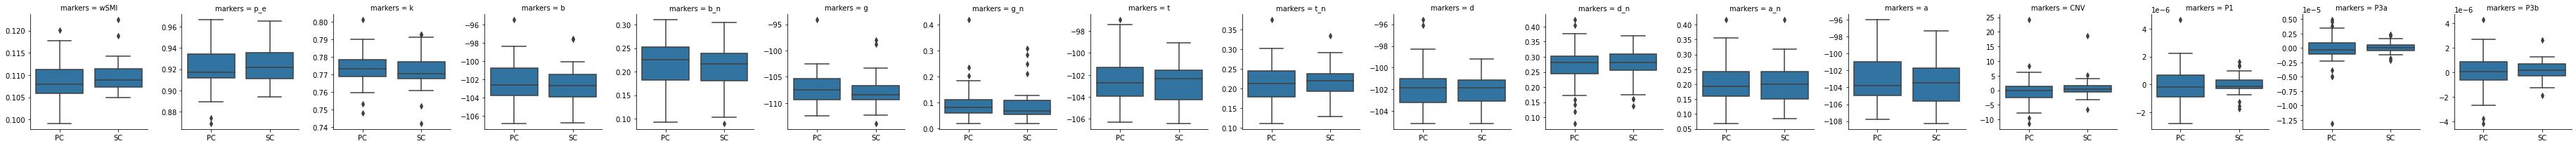

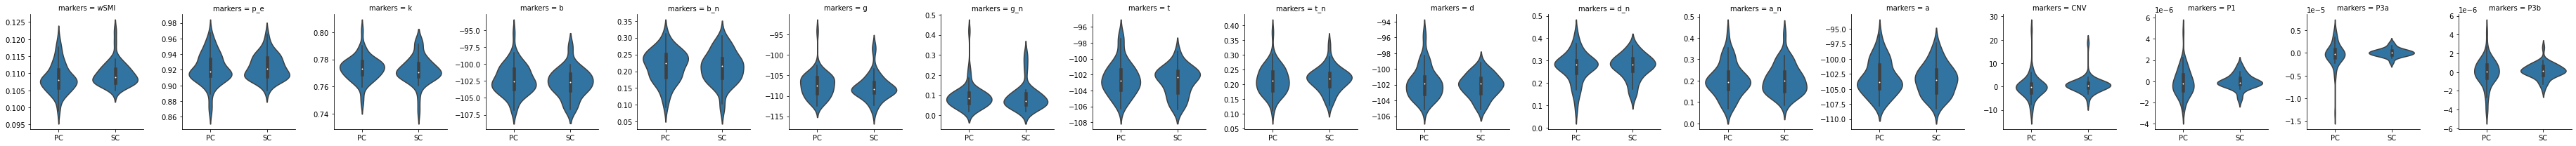

In [24]:
g = sns.FacetGrid(df_melt, col='markers', sharey = False)
g.map_dataframe(sns.boxplot, x='probe', y = 'val')
plt.show()

g = sns.FacetGrid(df_melt, col='markers', sharey = False)
ax = g.map_dataframe(sns.violinplot, x='probe', y = 'val')
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox


ValueError: The samples x and y must have the same length.

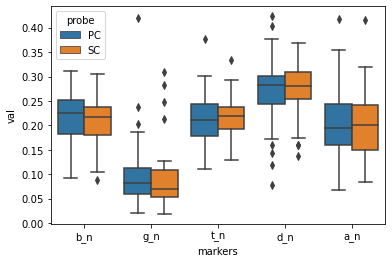

In [25]:
spectral = df_melt[df_melt['markers'].isin(["d_n", 't_n', 'a_n', 'b_n', 'g_n'])]

ax = sns.boxplot(x="markers", y="val", hue='probe', data=spectral);

test_pairs = [(('d_n', 'PC'), ('d_n', 'SC')), (('t_n', 'PC'), ('t_n', 'SC')), 
              (('a_n', 'PC'), ('a_n', 'SC')), (('b_n', 'PC'), ('b_n', 'SC')), 
              (('g_n', 'PC'), ('g_n', 'SC'))]

add_stat_annotation(ax, data=spectral, x="markers", y="val", hue='probe', 
                                   box_pairs=test_pairs,
                                   test='Wilcoxon', text_format='star',
                                   loc='outside', verbose=2)

plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox


ValueError: The samples x and y must have the same length.

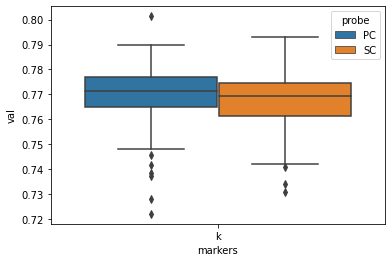

In [14]:
markers = ['k', 'p_e', 'wSMI']

for m in markers:
    df_ = df_melt[df_melt['markers'] == m]
    
    ax = sns.boxplot(x="markers", y="val", hue='probe', data=df_)
    
    add_stat_annotation(ax, data=df_, x="markers", y="val", hue='probe', 
                                   box_pairs=[((m, 'PC'), (m, 'SC'))],
                                   test='Wilcoxon', text_format='star',
                                   loc='outside', verbose=2)
    plt.show()